In notebook 7 we got a decent model with accuracy 96%. We now put thing together

* Read an image 
* Get its grid
* Load the model
* Pass the squares to the trained model
* Save results as numpy array
* (In the UI there will be a step to check and edit predictions in case there is any wrong)
* Pass the numpy array to the solver

## Set up

In [1]:
from skimage import io
import matplotlib.pyplot as plt
from module9 import *
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, interactive
from IPython.display import display,clear_output    
from skimage.color import rgb2gray


## Data

Thisis only needed until I do not provide my own image

In [ ]:
# set up folders
#imageDataDir = 'C:\\Users\\tequi\\Documents\\repos\\sudoku_dataset\\images\\'
imageDataDir = 'C:\\Users\\JOSA\\Documents\\imagesRepo\\sudoku_dataset\\images\\'

allImages = []
for file in os.listdir(imageDataDir):
    if file.endswith(".jpg"):
        allImages.append(file)

## Pick the corners

<IPython.core.display.Javascript object>


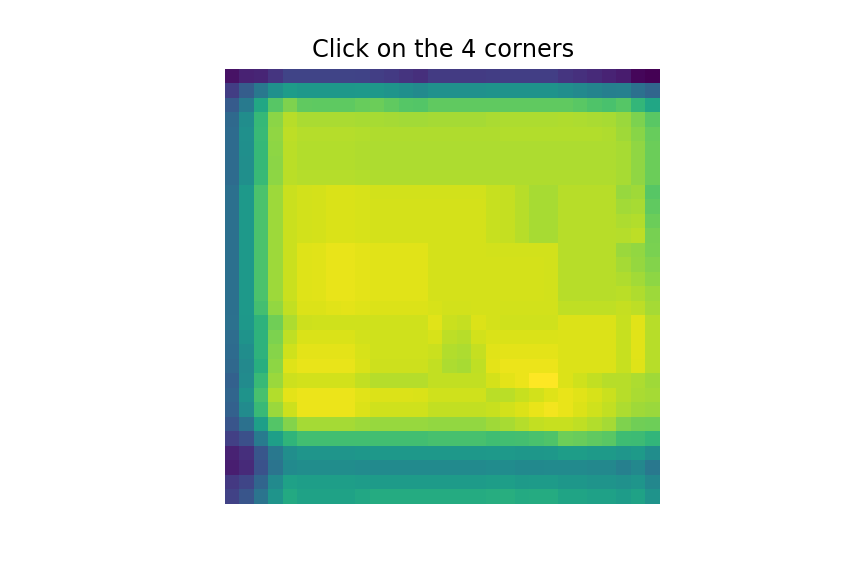

In [3]:

%matplotlib nbagg
# To prevent automatic figure display when execution of the cell ends
%config InlineBackend.close_figures=False 

filename = os.path.join(imageDataDir, allImages[0])
src = io.imread(filename)

f,a = plt.subplots()
a.imshow(src, cmap=plt.cm.gray)
a.set_axis_off()
a.set_title('Click on the 4 corners')
pos = []
def onclick(event):
    pos.append([int(event.ydata), int(event.xdata)]) #nned to invert to match row/col coord system
    a.plot(event.xdata, event.ydata, '+r')
#     if len(pos) == 4:
#         gridIs, allSquares = getImageGrid(pos, src)
#         gridIs = binary_erosion(gridIs)
#         overlayed = getOverlay(gridIs, src)
#         a.imshow(overlayed, cmap=plt.cm.gray)
    
f.canvas.mpl_connect('button_press_event', onclick)
f.show()

## Get squares

In [8]:
gridIs, allSquares = getImageGrid(pos, rgb2gray(src))

(81, 30, 30, 1)


## Load model

In [10]:
from keras.models import load_model
 
# load model
model = load_model('numbersModel.h5')

## Predict

[[0 0 0 7 0 0 0 4 0]
 [0 9 0 0 0 4 1 0 0]
 [0 0 6 4 0 6 0 7 0]
 [0 2 0 6 0 0 0 4 4]
 [0 0 0 2 0 0 0 4 0]
 [0 0 6 0 4 0 0 0 7]
 [0 0 0 9 0 0 0 4 0]
 [4 7 0 0 0 0 0 0 6]
 [1 0 5 0 0 4 0 0 0]]


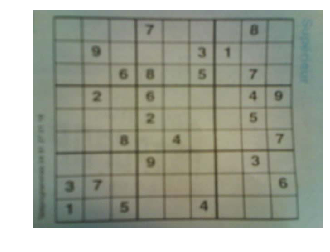

In [27]:
preds = []
for i in range(0,allSquares.shape[0]):
    pred = model.predict(allSquares[i].reshape(1, allSquares[i].shape[0], allSquares[i].shape[1], 1))
    preds.append(pred.argmax())
preds = np.asarray(preds).reshape((9,9))
print(preds)
plt.imshow(src, cmap=plt.cm.gray)
plt.axis('off')
plt.show()